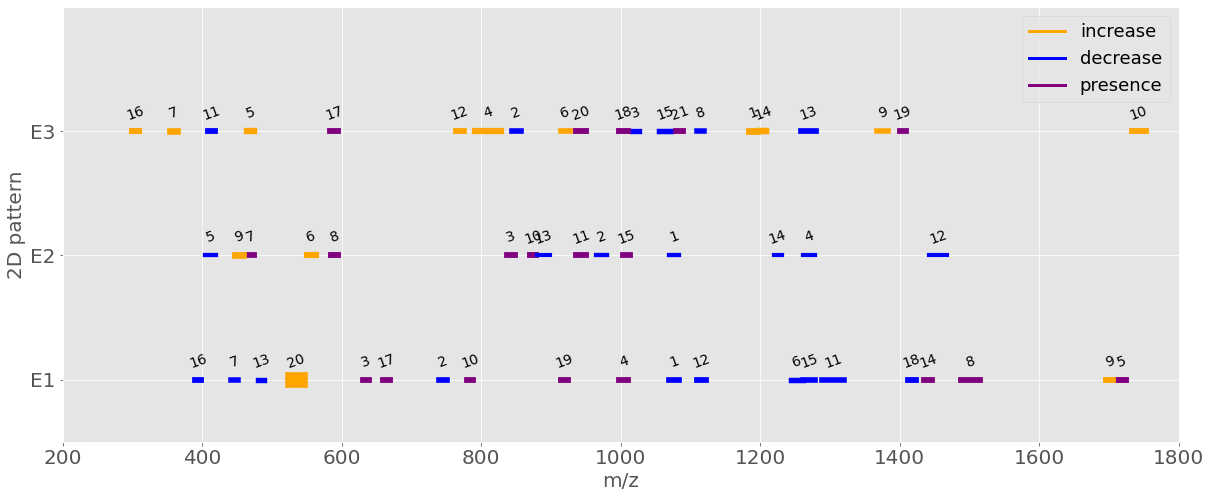

In [18]:
# SCRIPT TO GENERATE A  2D PROJECTON PLOT OF PATTERN 
# WITH QUALITATIVE INFORMATION ASSOCIATED TO X RANGE OF X VALUES    

#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


#define style of plot and size of figure
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 8)


# Generate a continous line interval to plot 
def ContinuousLineToPlot(y , xi, xf):
    Xdata= range(xi,xf)
    Ydata= []
    for x in Xdata:
        Ydata.append(y)
    return [Xdata, Ydata]


# function for converting mapped numerical key values into python color codes  
def VectorToColors(Vector, colors, numerical):
    ColorVector=[]
    for value in Vector:
        if value ==  numerical[0]:
          ColorVector.append(colors[0])
        elif value ==  numerical[1]:
          ColorVector.append(colors[1])
        elif value ==  numerical[2]:
          ColorVector.append(colors[2])
    return ColorVector        


# Define lists examples with pattern data ( 1, 2 and 3 example) 
# x ranges (initial i and final f), intensity/weight value (W) and qualitative interpretation (Q)

data_1i = [1070,740,630,998,1712,1244,442,1488,1696,780,1289,1110,480,1435,1262,390,660,1412,915,530]
data_1f = [1085,752,640,1012,1726,1262,453,1516,1707,790,1322,1124,490,1448,1280,400,670,1424,926,541 ]
data_1W = [ 0.68095809,0.685257503,0.80620155,0.80620155,0.892703863,0.467721583,0.509541802,0.80620155,0.800786996,0.80620155,0.557209241,0.7644291,0.394270261,0.80620155,0.616513922,0.797027859,0.823943662,0.801691272,0.823943662,10.64537917]
data_1Q = [ -1,-1,0,0,0,-1,-1,0,1,0,-1,-1,-1,0,-1,-1,0,-1,0,1 ]

data_2i = [ 1070,965,837,1262,404,550,464,585,447,870,936,1442,880,1220,1003]
data_2f = [ 1085,982,850,1280,421,564,476,596,460,880,952,1469,900,1232,1014]
data_2W = [ -0.708154325,-0.700506424,0.828025478,-0.829083916,-0.728438878,1.175107733,0.8125,
           0.896551724,1.721983368,0.896551724,0.828025478,-0.872555939,-0.907974003,-0.811198471,0.8125]
data_2Q = [ -1,-1,0,-1,-1,1,0,0,1,0,0,-1,-1,-1,0 ]

data_3i = [ 1184,844,1016,792,464,914,354,1110,1368,1733,409,764,1258,1200,1055,300,584,998,1400,936,1080]
data_3f = [1196,858,1028,829,476,928,365,1120,1384,1754,420,776,1281,1210,1074,310,596,1012,1410,952,1091]
data_3W = [1.788280832,0.615913927,0.301403212,1.190921211,1.318046364,0.683137197,1.623141845,0.521071158,0.569747071,0.842497211,0.808605192,0.829886489,0.709277073,1.496913925,0.468237342,0.941928915,0.835714286,0.887804878,0.798245614,0.866666667,0.835714286]
data_3Q = [ 1,-1,-1,1,1,1,1,-1,1,1,-1,1,-1,1,-1,1,0,0,0,0,0]


# Set a list of lists with pattern data to plot
Patterns = [ [data_1i, data_1f, data_1W, data_1Q ] , 
              [data_2i, data_2f , data_2W, data_2Q ]  , 
              [data_3i, data_3f, data_3W, data_3Q]  ] 

#define positional Y values for the pattern plots and lables intrepretation
Ypatterns_values = [1, 2 , 3]
Lables = [ "increase", "decrease", "presence"]

# define mapped colors and numbers
numerical  = [ 1, -1 , 0 ] 
colors = ["orange", "blue", "purple" ]

#PLOT data
for n, model in enumerate(Patterns):
    Y = Ypatterns_values[n]
    L = Lables[n] 
    W = model[2]
    C = VectorToColors(model[3], colors, numerical)
    for i, Vxi in enumerate(model[0]):
        iText = ""+str(i +1 )  
        Vxf = model[1][i]  
        FT= ContinuousLineToPlot(Y , Vxi, Vxf)
        TextPosition = float(min(FT[0]) + max(FT[0])) / 2   
        plt.plot(FT[0], FT[1],  color = C[i] , linewidth = 5 + W[i])
        plt. text( TextPosition, min(FT[1]) + 0.15 , iText , horizontalalignment='center', fontsize=14 , rotation=20,verticalalignment='center')

# define pattern lables         
for i, c in  enumerate(colors):
    plt.plot( [], [],  color = c  ,linewidth=3, label= Lables[i])

plt.xlabel('m/z' , size = 20)
plt.ylabel('2D pattern' , size = 20)
plt.tick_params(axis='both', labelsize = 20) # set the font of axis values
plt.legend( fontsize = 18)
plt.yticks([1, 2, 3], ["E1" , "E2", "E3" ] , fontsize=20, rotation = 0)
plt.axis([200, 1800, 0.5, 4] )
plt.show() 